In [1]:
!pip install missingno

In [2]:
print("Hello")

Hello


In [3]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
!pip install cmaes
import cmaes
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


c:\Users\anush\anaconda3\envs\mleng\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Data

In [4]:
global device
device='cpu'

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
original=pd.read_csv('Churn_Modelling.csv')

train.drop(columns=['id'],inplace=True)
test.drop(columns=['id'],inplace=True)
original.drop(columns=['RowNumber'],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

original["original"]=1
train["original"]=0
test["original"]=0

train=pd.concat([train,original.dropna()],axis=0)
train.reset_index(drop=True,inplace=True)

target='Exited'

train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,original
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0


## Missing Values

In [5]:
table=PrettyTable()
table.field_names=['Feature','Data Type','Train missing%','Test missing%','Original missing%']

for col in train_copy.columns:
    data_type=str(train_copy[col].dtype)
    train_missing=np.round(train_copy[col].isnull().mean()*100,2)
    if col!=target:
        test_missing=np.round(test_copy[col].isnull().mean()*100,2)
    else:
        test_missing='NA'
    orig_missing=np.round(original_copy[col].isnull().mean()*100,2)

    table.add_row([col,data_type,train_missing,test_missing,orig_missing])

print(table)

+-----------------+-----------+----------------+---------------+-------------------+
|     Feature     | Data Type | Train missing% | Test missing% | Original missing% |
+-----------------+-----------+----------------+---------------+-------------------+
|    CustomerId   |   int64   |      0.0       |      0.0      |        0.0        |
|     Surname     |   object  |      0.0       |      0.0      |        0.0        |
|   CreditScore   |   int64   |      0.0       |      0.0      |        0.0        |
|    Geography    |   object  |      0.0       |      0.0      |        0.01       |
|      Gender     |   object  |      0.0       |      0.0      |        0.0        |
|       Age       |  float64  |      0.0       |      0.0      |        0.01       |
|      Tenure     |   int64   |      0.0       |      0.0      |        0.0        |
|     Balance     |  float64  |      0.0       |      0.0      |        0.0        |
|  NumOfProducts  |   int64   |      0.0       |      0.0      | 

## Target Distributions

In [6]:
# def plot_pie_charts(data,title,ax):
train[target].value_counts()
    

0    138073
1     36959
Name: Exited, dtype: int64

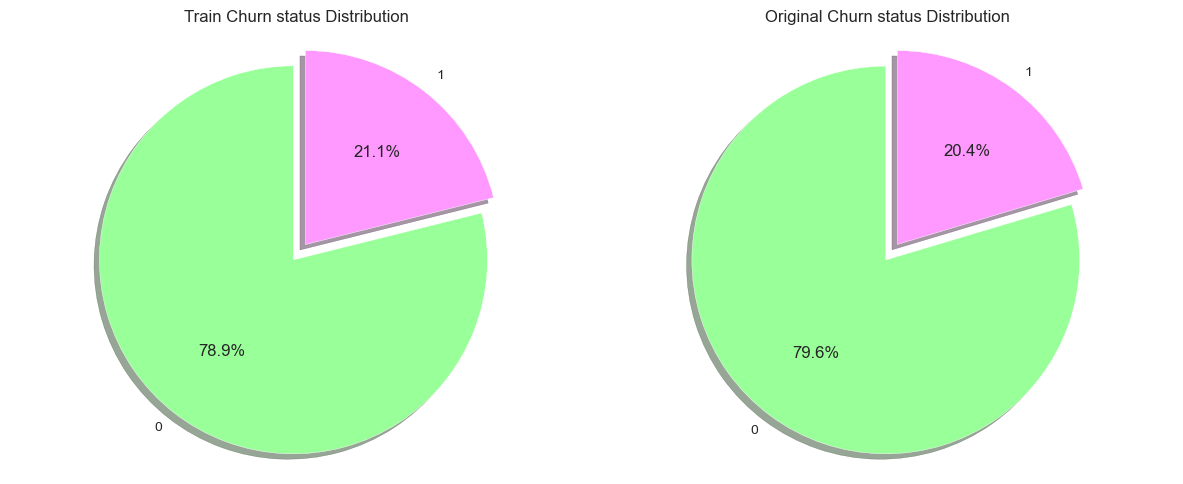

In [29]:
def plot_pie_charts(data,title,ax):
    data_counts=data.value_counts(target)
    labels=data.value_counts(target).index
    sizes=data.value_counts(target).values
    colors=['#99ff99','#ff99ff'] # color can be represented by RGB tuples, hex code and color names
    explode=(0.1,0) # 10% of the radius is offset from center
    ax.pie(sizes,
           explode=explode, # fraction of radius with wedge to offset each wedge
           labels=labels,
           colors=colors,
           autopct='%1.1f%%', # %1.1f represent one digit after decimal point and %% means to show % sign
           shadow=True,
           startangle=90)
    ax.axis('equal')
    ax.set_title(title)

fig,axes=plt.subplots(1,2,figsize=(12,5))

plot_pie_charts(train[target],'Train Churn status Distribution',axes[0])
plot_pie_charts(original[target],'Original Churn status Distribution',axes[1])

plt.tight_layout()
plt.show()


Target distribution is similar for original and synthetic datasets



### Numerical Feature Distributions

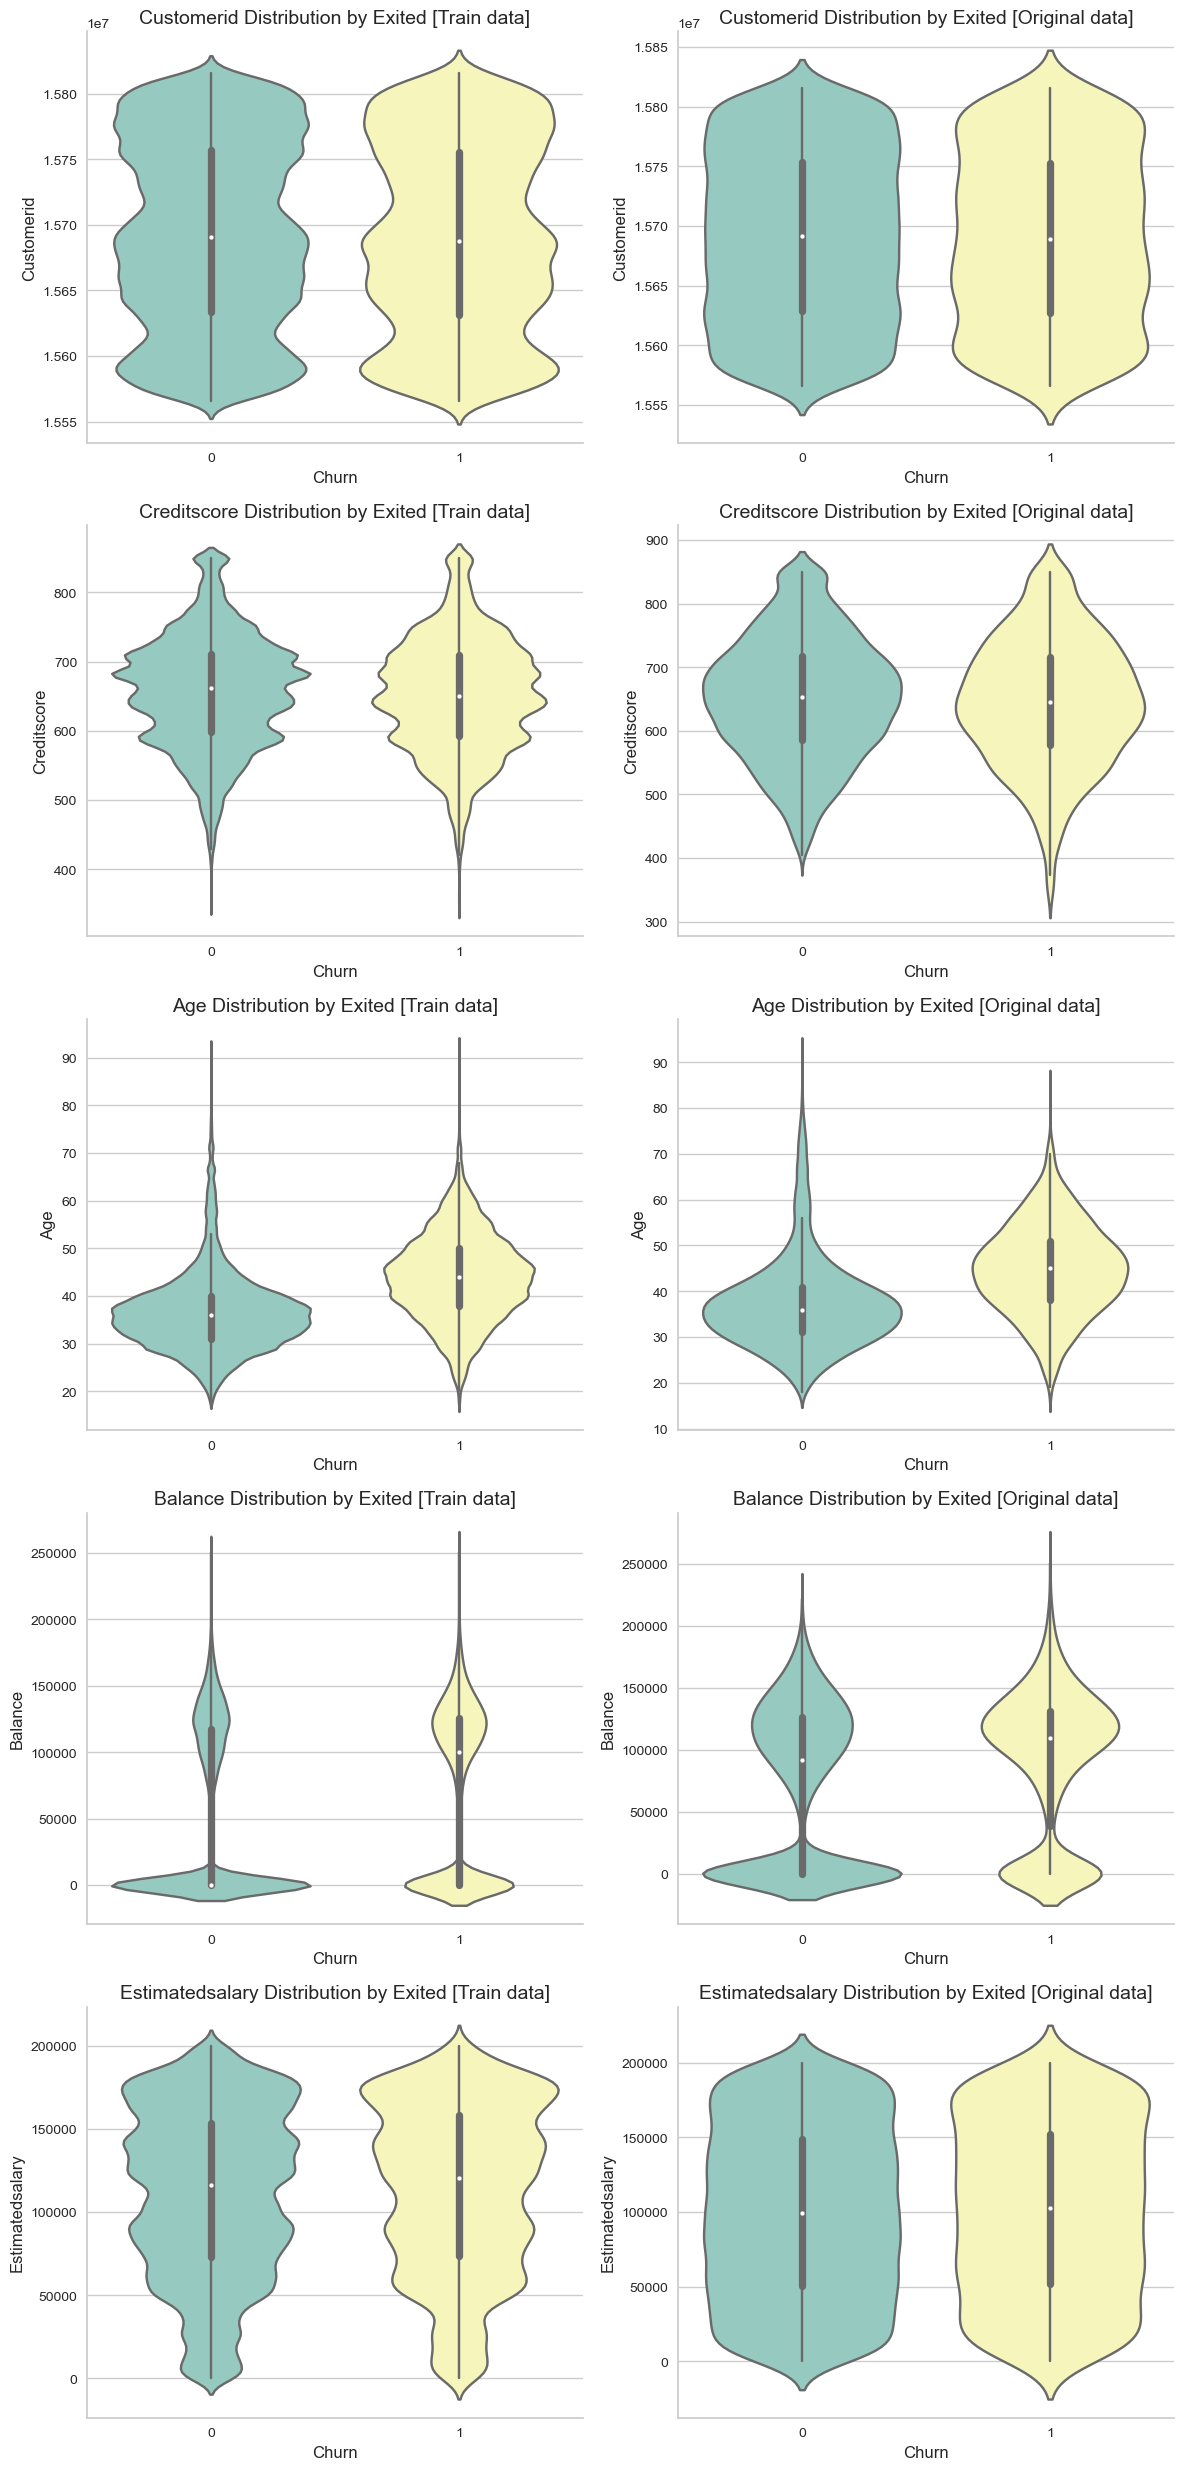

In [57]:
continuous_columns=[col for col in train.columns if train[col].dtype!='O' and train[col].nunique()>21]
n_rows=len(continuous_columns)

fig,axes=plt.subplots(n_rows,2,figsize=(12,5*n_rows))
sns.set_palette('Set3')

for i,col in enumerate(continuous_columns):
    sns.violinplot(x=target,y=col,data=train,ax=axes[i,0])
    axes[i,0].set_title(f"{col.title()} Distribution by {target} [Train data]",fontsize=14)
    axes[i,0].set_xlabel('Churn',fontsize=12)
    axes[i,0].set_ylabel(f"{col.title()}",fontsize=12)
    sns.despine()  # remove top  and right spines

    sns.violinplot(x=target,y=col,data=original,ax=axes[i,1])
    axes[i,1].set_title(f"{col.title()} Distribution by {target} [Original data]",fontsize=14)
    axes[i,1].set_xlabel('Churn',fontsize=12)
    axes[i,1].set_ylabel(f"{col.title()}",fontsize=12)
    sns.despine()  # remove top  and right spines

plt.tight_layout()
plt.show()


Estimated salary seem to have a bit different in distributions

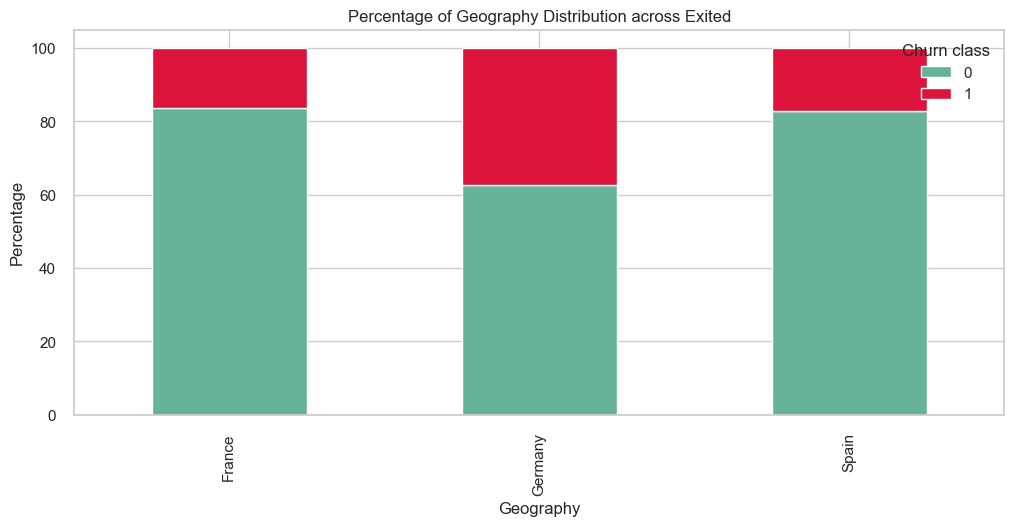

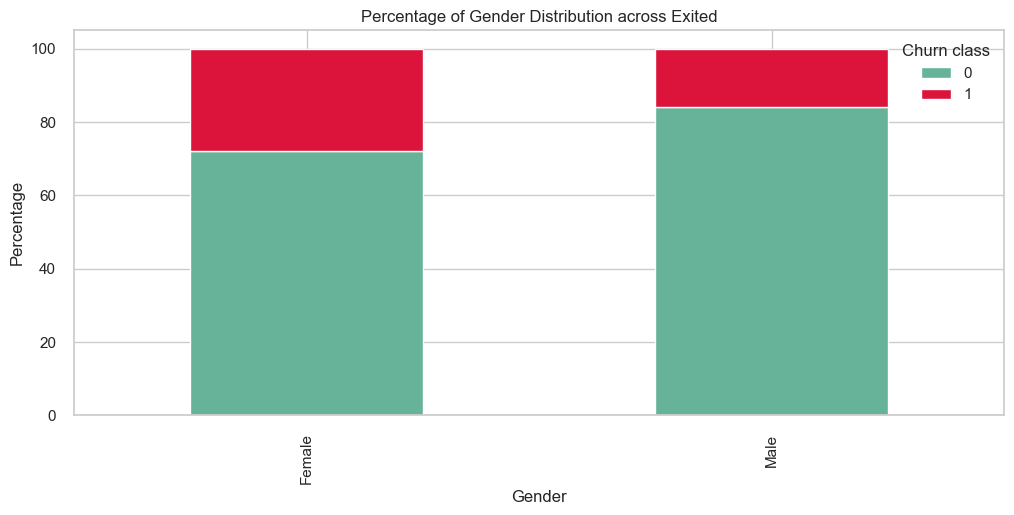

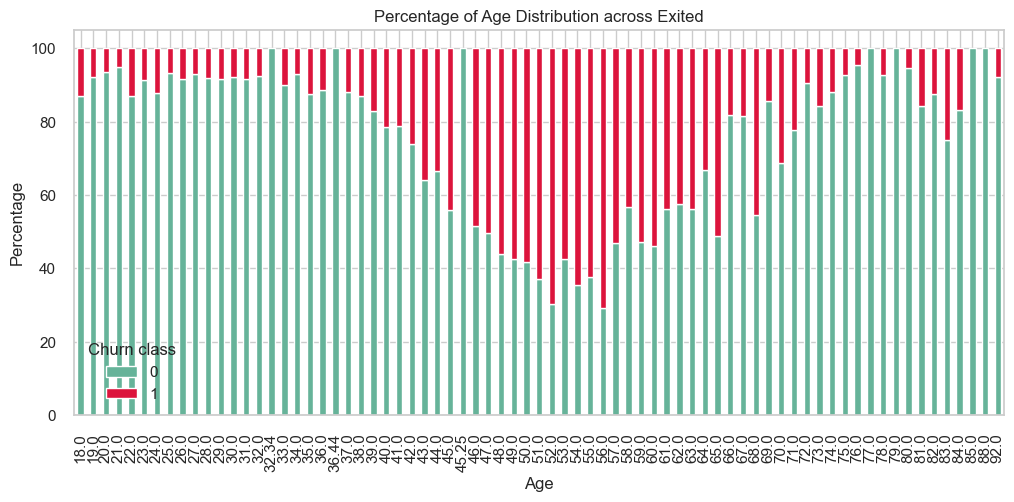

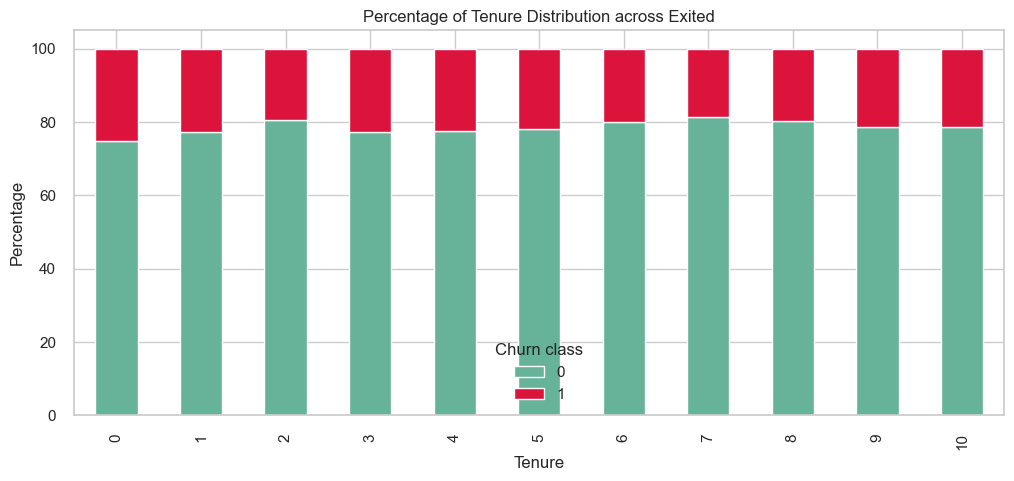

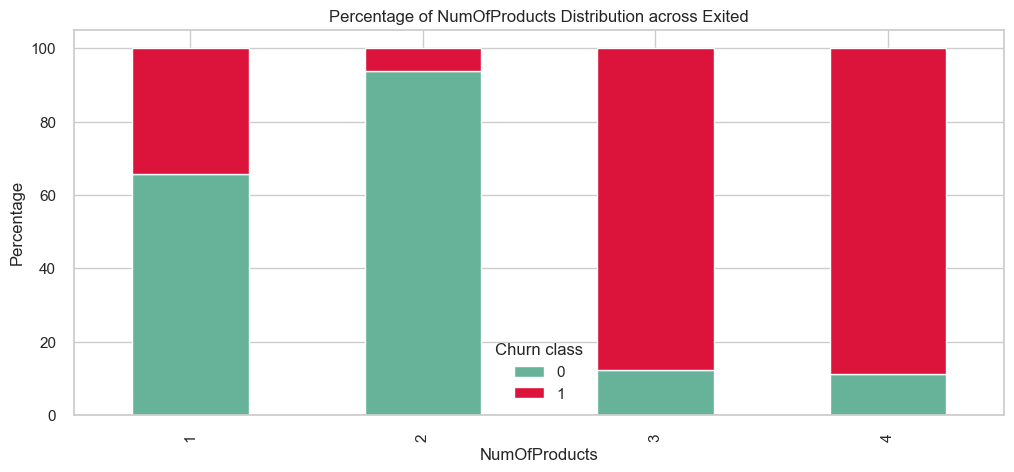

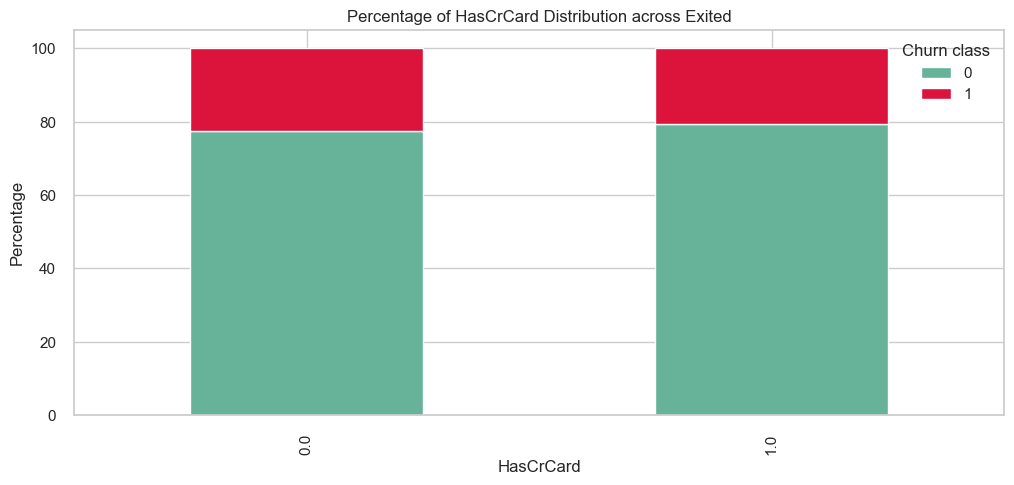

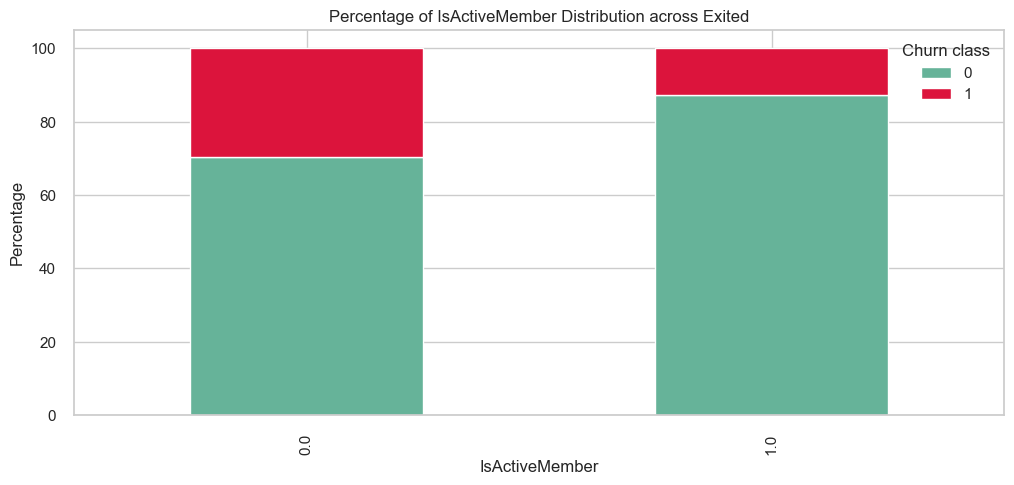

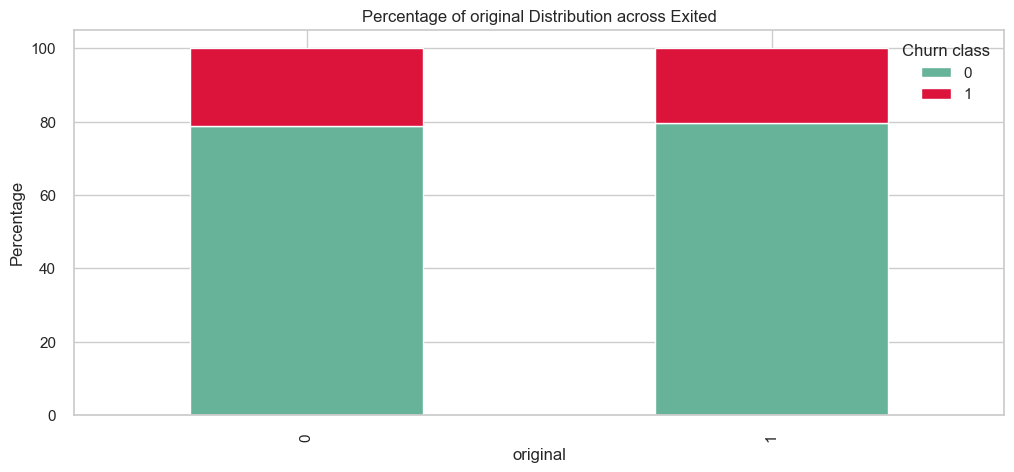

In [80]:
categorical_columns=[col for col in train.columns if train[col].dtype=='O' and train[col].nunique()<100 or train[col].dtype!='O' and train[col].nunique()<100 and col not in [target]]
custom_palette=(0.4,0.7,0.6),'crimson'

for col in categorical_columns:
    contigency_table=pd.crosstab(train[col],train[target],normalize='index')*100
    sns.set(style="whitegrid")
    contigency_table.plot(kind="bar",
                          stacked=True,
                          color=custom_palette,
                          figsize=(12,5))
    plt.title(f"Percentage of {col} Distribution across {target}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Churn class")
    plt.show()

## Feature Engineering


In [112]:
def min_max_scaler(train, test, column):
    '''
    Min Max just based on train might have an issue if test has extreme values, hence changing the denominator uding overall min and max
    '''
    sc=MinMaxScaler()
    
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    
    return train,test  

def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combines the data so that no category is missed and
    the category with least frequency can be dropped because of redundancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }
def rmse(y1,y2):
    ''' RMSE Evaluator'''
    return(np.sqrt(mean_squared_error(np.array(y1),np.array(y2))))

def store_missing_rows(df, features):
    '''Function stores where missing values are located for given set of features'''
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_numerical(train,test,target, max_iterations=10):
    '''Iterative Missing Imputer: Updates filled missing values iteratively using CatBoost Algorithm'''
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)
        
    
    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    features=[ f for f in df.columns if df[f].isna().sum()>0]
    if len(features)>0:
        # Step 1: Store the instances with missing values in each feature
        missing_rows = store_missing_rows(df, features)

        # Step 2: Initially fill all missing values with "Missing"
        for f in features:
            df[f]=df[f].fillna(df[f].mean())

        cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
        dictionary = {feature: [] for feature in features}

        for iteration in tqdm(range(max_iterations), desc="Iterations"):
            for feature in features:
                # Skip features with no missing values
                rows_miss = missing_rows[feature].index

                missing_temp = df.loc[rows_miss].copy()
                non_missing_temp = df.drop(index=rows_miss).copy()
                y_pred_prev=missing_temp[feature]
                missing_temp = missing_temp.drop(columns=[feature])


                # Step 3: Use the remaining features to predict missing values using Random Forests
                X_train = non_missing_temp.drop(columns=[feature])
                y_train = non_missing_temp[[feature]]

                model= lgb.LGBMRegressor(**lgb_params)
                model.fit(X_train, y_train, verbose=False)

                # Step 4: Predict missing values for the feature and update all N features
                y_pred = model.predict(missing_temp)
                df.loc[rows_miss, feature] = y_pred
                error_minimize=rmse(y_pred,y_pred_prev)
                dictionary[feature].append(error_minimize)  # Append the error_minimize value

#         for feature, values in dictionary.items():
#             iterations = range(1, len(values) + 1)  # x-axis values (iterations)
#             plt.plot(iterations, values, label=feature)  # plot the values
#             plt.xlabel('Iterations')
#             plt.ylabel('RMSE')
#             plt.title('Minimization of RMSE with iterations')
#             plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
        train[features] = np.array(df.iloc[:train.shape[0]][features])
        test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

### Numerical Transformations

1. Log Transformation
2. Square Root Transformation
3. Box-Cox Transformation
4. Yeo-Johnson Transformation -similar to boxcox but can be applied for both positive and negative data
5. Power Transformation -raising each data point to a power


In [113]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique()/train.shape[0]*100>1]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=0
overall_best_col='none'

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Initial ROC_AUC', 'Transformation', 'Tranformed ROC_AUC']

    for col in cont_cols:
        
        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])
        
        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        scaled_data = transformer.fit_transform(combined_data + epsilon)

        train_copy["bx_cx_" + col] = scaled_data[:train_copy.shape[0]]
        test_copy["bx_cx_" + col] = scaled_data[train_copy.shape[0]:]
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        
        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col,  "pow_"+col , "pow2_"+col,"log_sqrt"+col]
        
        train_copy,test_copy = fill_missing_numerical(train_copy,test_copy,target,5)
#         train_copy[temp_cols] = train_copy[temp_cols].fillna(0)
#         test_copy[temp_cols] = test_copy[temp_cols].fillna(0)
        
        pca = TruncatedSVD(n_components=1)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")
        
        test_copy = test_copy.reset_index(drop=True)
        
        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')
        
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
        auc_scores = []
        
        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values
            
            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
#                 model =   SVC(gamma="auto", probability=True, random_state=42)
                model =   LogisticRegression() # since it is a large dataset, Logistic Regression would be a good option to save time
                model.fit(X_train,y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val, y_pred))
            auc_scores.append((f, np.mean(auc)))
            
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f

            if f == col:
                orig_auc = np.mean(auc)
                
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        
        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_auc,best_col ,best_auc])
    print(table)   
    print("overall best CV ROC AUC score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, target)